# Julia III

# Uso de bibliotecas o librerías. 

> Diego Alberto Olvera Millán
>
> Ricardo Méndez Fragoso $\mathbb{R}i \vec c \hbar$

En general, los lenguajes de programación se complementan con las llamadas 'paqueterías' que incorporan herramientas útiles que pueden ayudarnos. En Julia, una paquetería consiste de un conjunto de funciones especializadas para resolver algún problema particular. Por ejemplo, existen bibliotecas o librerías que incorporan funciones que nos permiten hacer gráficos, otras que tienen funciones de álgebra lineal, otras que resuelven ecuaciones diferenciales, etc. 

Primero veamos cómo se instalan dichas paqueterías. Lo primero que hay que hacer es abrir julia en su IDE (Interactive Development Enviroment). Esto se puede hacer en Mac y Windows haciendo doble click en el ícono de Julia que se descarga automáticamente después de instalar Julia. Usualmente este entorno de programación es una terminal de comandos.

Una vez que estamos en Julia podemos instalar los paquetes que queramos con la función `Pkg.add("nombre-del-paquete")`. De entrada se recomienda instalar 3 bibliotecas que son de mucha utilidad: 

```julia
Pkg.add("PyPlot")
Pkg.add("SymPy")
Pkg.add("Gadfly")
```

Muy probablemente no se instale la versión más reciente de los paquetes. Para descargar la versión más reciente de todos los paquetes se usa `Pkg.update()`. Si sólo queremos actualizar un paquete en especial ponemos el nombre del paquete entre comillas dentro del argumento. 

>Si quieres saber más sobre las funciones asociadas a los paquetes puedes buscar [aquí](https://docs.julialang.org/en/stable/stdlib/pkg). Una lista de todos los paquetes disponibles se encuentra [aquí](http://pkg.julialang.org/). 

Los primeros dos son bibliotecas relacionadas con Python que se pueden usar en Julia gracias a otra paquetería llamada *PyCall* que viene preinstalada por lo que los podemos usar sin ningún problema. El tercero es una paquetería de graficación escrito en Julia. 

En los Jupyter Notebooks se importa una librería escribiendo en alguna celda:

``` julia
using nombre_de_paquetería
```

alternativamente se puede usar el comando 

```julia 
import nombre_de_paquetería
```

pero esto induce algunas diferencias que el lector puede ver usando `?`. En este Notebook usaremos las dos formas, esto debido a que tanto PyPlot como Gadfly importan la función `plot`, si importaremos las dos paqueterías con `using` habría un conflicto, entonces usaremos `import`, aunque en general es mucho más sencillo importar con `using` cuando sólo se utiliza una biblioteca. 

## Biblioteca PyPlot

In [1]:
import PyPlot

PyPlot importa muchas funciones de las cuales la más importante es `plot`. Como incorporamos la paquetería con `import`, cada vez que queramos usar una fucnión que viene de esta paquetería tendremos que usar el prefijo `PyPlot.la_funcion`. Esto lo hicimos porque Gadfly tiene también la función `plot` (aunque son distintas) y la usaremos más adelante. `Plot` funciona con arreglos, rangos o tuplas. La sintáxis para esta función suele ser del tipo:

```julia
PyPlot.plot(arreglo_1,arreglo_2,"color-y-estilo-del-marcador")
# En general, en muchos notebooks solo no se utiliza import, sino que se 
# utiliza using y se omite el PyPlot.plot, quedando solo plot.
```

El primer argumento son los números del eje $x$, el segundo son los del eje $y$ y en el tercero se pasa un argumento que indicara el color y el tipo de marcador que queremos que lleve cada punto. En general, no importa que los primeros dos argumentos no sean del mismo tipo pero sí que sean del mismo tamaño y que se indexen con la misma cantidad de números. Además de estos tres, hay muchos otros argumentos. Si quieres ver algunos más y una lista de los tipos de marcador y las formas de indicarlos puedes ejecutar `?PyPlot.plot`. 

Veamos un ejemplo muy sencillo:

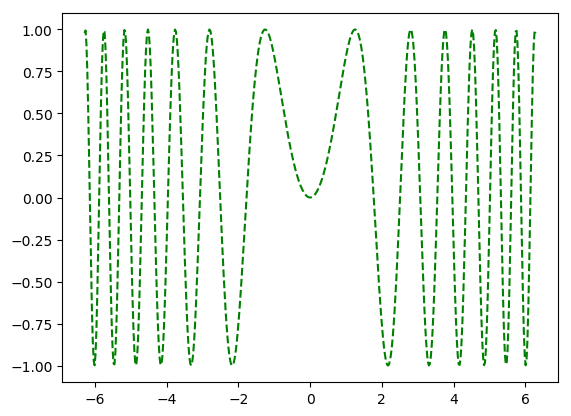

In [2]:
x = collect(linspace(-2*pi,2*pi,500))
y = sin.(x.^2)
PyPlot.plot(x,y,"g--") #'g' es por green (verde) y '--' indica que queremos linea punteada.
PyPlot.show()

Veamos una gráfica que contenga varios de los elementos importantes de PyPlot, algunas de las funciones se explican solas, como `PyPlot.title`, se deja como ejercicio al lector entender qué hace cada línea de la siguiente celda. Nota, además, que hay 4 gráficas superpuestas. Si quieres aprender más sobre PyPlot puedes hacerlo [en este enlace](http://matplotlib.org/users/pyplot_tutorial.html).

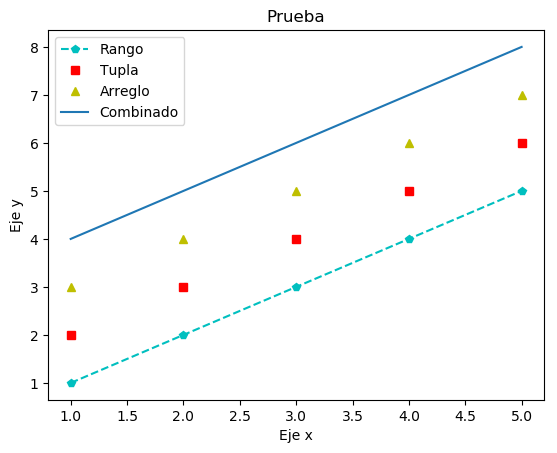

In [3]:
PyPlot.title("Prueba")
PyPlot.plot(1:5 , 1:5, "cp--" , label = "Rango")
PyPlot.plot((1,2,3,4,5) , (2,3,4,5,6), "rs" , label = "Tupla")   #Los espacios no son necesarios, se pusieron por claridad.
PyPlot.plot([1,2,3,4,5] , [3,4,5,6,7], "y^" , label = "Arreglo")
PyPlot.plot([1,2,3,4,5] , (4,5,6,7,8), label = "Combinado")
PyPlot.legend()
PyPlot.xlabel("Eje x"); PyPlot.ylabel("Eje y")
PyPlot.show()

***

## Gadfly 

Al igual que *PyPlot*, *Gadfly* sirve para hacer graficas, pero tienen diferencias importantes. Una de las principales es que Gadfly funciona muy bien con un tipo de dato llamado *DataFrame*. Veamos de que se trata. 

In [4]:
import Gadfly

### DataFrame

Los DataFrame's son estructuras numéricas que son muy útiles para la programación y vienen preinstalados cuando se instala Julia. 

In [5]:
using DataArrays, DataFrames

Primero definamos la siguiente variable:

In [6]:
D = DataFrame(Float64,2,2)

,x1,x2
1,NA,NA
2,NA,NA


In [7]:
typeof(D)

DataFrames.DataFrame

D es un DataFrame de `2x2` elementos los cuales son números flotantes. Podemos reemplazar el nombre de las columnas y llenar cada elemento con un número:

In [8]:
D[:x1] = [3,4] ; D[:x2] = [-2,-1]    #Reemplazamos los valores de las columnas.
rename!(D,:x1,:Columna1) ; rename!(D,:x2,:Columna2) #Le cambiamos la etiqueta.
D

,Columna1,Columna2
1,3,-2
2,4,-1


Cuando nos queremos referir a toda una columna de un DataFrame debemos usar los dos puntos `:` para indicar que hablamos de una columna. Cada columna de un DataFrame es un objeto llamado DataArray: 

In [9]:
D[:Columna1]

2-element DataArrays.DataArray{Int64,1}:
 3
 4

Los elementos de un DataFrame se indexan del mismo modo que se indexan los arreglos normales. 

In [10]:
D[1,2]

-2

Podemos definir desde el principio cuales serán los elementos de nuestro DataFrame y nombrar las columnas:

In [11]:
DataFrame(A =1:4, B = ["M", "F", "F", "M"])

,A,B
1,1,M
2,2,F
3,3,F
4,4,M


Ahora, imaginemos que tenemos un arreglo y lo queremos convertir en un DataFrame. Esto se hace mediante la función `convert`.

In [12]:
arr = rand(5,2);
convert(DataFrame,arr)

,x1,x2
1,0.035636018447682494,0.9081739364181545
2,0.8995516798543379,0.22903732123730114
3,0.7719509643349509,0.8540838737266665
4,0.6384516924429406,0.6495587782622927
5,0.5153308956952032,0.9406255107351249


Ahora podríamos renombrar las columnas si quisiéramos, también podríamos hacer lo siguiente:

In [13]:
DF=DataFrame(Columna1 = arr[:,1],Columna2 = arr[:,2])

,Columna1,Columna2
1,0.035636018447682494,0.9081739364181545
2,0.8995516798543379,0.22903732123730114
3,0.7719509643349509,0.8540838737266665
4,0.6384516924429406,0.6495587782622927
5,0.5153308956952032,0.9406255107351249


### Graficar con *Gadfly*

Ahora veamos como utilizar Gadfly para realizar gráficas, recordemos que tenemos que usar el prefijo `Gadfly.` debido a que llamamos al paquete usando `import` y no `using`. La sintaxis de la función `plot` suele ser de la forma:

```julia
plot(datos, x = :x1, y = :x2, Geom.forma)
```

donde `datos` es el DataFrame que contiene la información que queremos graficar, en el segundo y tercer argumento especificamos que columna será el eje $x$ y cuál el eje $y$, y en el 4º argumento sustituimos forma por el tipo de geometría que queremos que haya en los puntos graficados. El tener que especificar quien será el eje $x$ y quien el $y$ parecería ser de poca utilidad, pero hay que tener en cuenta que muchas veces queremos analizar tablas de datos que no son de dos columnas, en estas ocasiones es muy útil poder especificar los ejes.

Veamos un ejemplo:

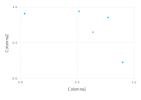

In [14]:
Gadfly.plot(DF, x = :Columna1, y = :Columna2, Gadfly.Geom.point)

La ventaja de los DataFrame en Julia es que permite una asignación dinámica como se verá a continuación con el siguiente ejemplo:

In [15]:
ej = DataFrame()
ej[:A] = 1:8
ej[:B] = rand(8)
ej[:C] = ["M", "F", "F", "M", "F", "M", "M", "F"]
ej

,A,B,C
1,1,0.4848504290867588,M
2,2,0.6780339731386664,F
3,3,0.08114820215625174,F
4,4,0.742440617392085,M
5,5,0.9527335776580044,F
6,6,0.8478202579298197,M
7,7,0.11910949748160715,M
8,8,0.04165654390181728,F


Pensemos que la tabla anterior representa en la `columna A` a algún individuo, la `columna B` representa su calificación en una tarea y la `columna C` indica el género del individuo. De esta manera podríamos hacer la siguiente gráfica: 

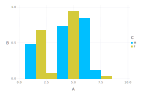

In [16]:
Gadfly.plot(ej, x = :A, y = :B, color = :C, Gadfly.Geom.bar)

Esto nos permite organizar la información muy claramente y puede resultar muy útil. Hay muchas geometrías posibles y otros argumentos que puede tomar la función `plot`. Para aprender más sobre Gadfly puedes revisar el [tutorial de Gadfly](http://gadflyjl.org/stable/tutorial.html). Si quieres aprender más sobre DataFrames puedes buscar en el [Manual de DataFrames](https://github.com/JuliaData/DataFrames.jl) o ver el [Tutorial de DataFrames](https://github.com/bkamins/Julia-DataFrames-Tutorial).

> Note que *Gadfly* es una biblioteca que estéticamente es mucho mejor y además el hecho de que está hecha en Julia, hace que sea más eficiente y permite tener más herramientas.

***

## SymPy 

In [17]:
using SymPy

La paquetería SymPy se ocupa para hacer operaciones simbólicas en la computadora. ¿Esto qué quiere decir?. Podremos definir un tipo de objeto llamado símbolo y con él se pueden hacer operaciones matemáticas simbólicamente, estas operaciones pueden ser sencillas como expandir o factorizar un trinomio pero pueden ser más complicadas como integrar, derivar y resolver ciertas ecuaciones diferenciales. Veamos cómo se hace esto. Primero definimos una variable del tipo `Sym`.  

In [18]:
x=symbols("x")

x

In [19]:
typeof(x)

SymPy.Sym

También se pueden definir como tuplas: 

In [20]:
y,z=symbols("y,z")

(y, z)

Y se pueden definir con algunas propiedades:

In [21]:
b = symbols("beta",nonnegative=true,real=true)

beta

Ahora veamos que es una expresión simbólica. 

In [22]:
expr=(x+y)^2 -z #Esta es una expresión simbolica. 

            2
-z + (x + y) 

Ahora veamos algo interesante. Si agrego un número a la expresión, SymPy automáticamente convierte al uno en un símbolo:

In [23]:
expr + 1

            2    
-z + (x + y)  + 1

In [24]:
expr + 1//2

            2   1
-z + (x + y)  + -
                2

Podemos expandir y facotrizar estas expresiones: 

In [25]:
ex_expr = expand(expr)

 2            2    
x  + 2*x*y + y  - z

In [26]:
factor(x^2 + 2x*y + y^2)

       2
(x + y) 

Hay una forma muy útil de pedir a SymPy que realice estás operaciones es utilizando el operador de evaluación: `|>`. En la siguiente celda se muestra el manual interno de `|>`

In [27]:
?|>

search: |>



```
|>(x, f)
```

Applies a function to the preceding argument. This allows for easy function chaining.

```jldoctest
julia> [1:5;] |> x->x.^2 |> sum |> inv
0.01818181818181818
```


In [28]:
expr |> expand |> x-> x+z |> factor 

       2
(x + y) 

La celda anterior se ejecutó de la siguiente manera: 

- Le damos la expresión como argumento inicial. 

- El operador de evaluación le dice que aplique la función `expand` a `expr`.

- Ahora hacemos el cambio $x$ va a $x+z$ mediante el operador `->`, con esto nos deshacemos de la z. 

- A lo que quede de realizar esa operación se le aplica la función `factor`.

Esta forma de evaluar funciones puede facilitar enormemente algunas cuentas muy complicadas, además de ser muy clara. 

Ahora veamos algunas cosas que se pueden hacer con *SymPy*. 

In [29]:
v,et=symbols("nu,eta")

(nu, eta)

Podemos hacer integrales indefinidas. En este caso veamos cual es el resultado de hacer la integral indefinida de  $\int \nu e^\nu d\nu$ :

In [30]:
integrate(v*e^v,v)

          nu
(nu - 1)*e  

También se pueden hacer integrales definidas, como por ejemplo $\int _{-1} ^1 x^2 dx$ : 

In [31]:
integrate(x^2,(x,-1,1))   #El primer argumento es la función y el segundo argumento es una tupla cuyos elementos son:
                          #1: Variable sobre la que se va a integrar.
                          #2: Límite inferior de integración. 
                          #3: Límite superior. 

2/3

Es fácil ver que analíticamente el resultado es $\left. \frac{x^3}{3} \right| _{-1} ^1 = \frac{2}{3}$. Otro ejemplo es una integral como la siguiente:
$$\int _0 ^{\infty} xe^{-x^2} dx $$

In [32]:
integrate(x * e^(-x^2),(x,0,oo))

1/2

Podemos hacer derivadas en una varible o derivadas parciales de una función. Por ejemplo:
$$\frac{\partial}{\partial \nu} \left( \nu + \frac{\eta}{\nu} \right)$$

In [33]:
diff(v + et/v,v) #El primer argumento es la función que se va a derivar y el segundo
                 #elemento la variable sobre la cual se deriva.

  eta    
- --- + 1
    2    
  nu     

También podemos realizar la derivada parcial respecto de la otra variable:
$$\frac{\partial}{\partial \eta} \left( \nu + \frac{\eta}{\nu} \right)$$

In [34]:
diff(v + et/v,et)

1 
--
nu

Podemos buscar los límites de funciones. Por ejemplo:
$$\lim _{x \to 0} \frac{\sin x^2}{x^2}$$

In [35]:
limit(sin(x^2)/x^2,x,0)

1

También podemos resolver ecuaciones. Por ejemplo:
$$x^2+1=0$$

In [36]:
solve(x^2 + 1,x)

2-element Array{SymPy.Sym,1}:
 -I
  I

En la función anterior, se asume que el primer argumento de la función se iguala a cero. El segundo argumento dice la variable para la cual queremos resolver la ecuación. Lo que nos devuelve es un arreglo simbólico con todas las soluciones a la expresión algebraica que se presenta. Otro ejemplo es:
$$x^2-y =0$$

In [37]:
solve(x^2 - y,x)

2-element Array{SymPy.Sym,1}:
 -sqrt(y)
  sqrt(y)

Recordemos que definimos arriba $\beta$ con un par de propiedades. Veamos que pasa si tratamos de resolver $\beta$ en una ecuación en la que no hay solución bajo las condiciones que se piden sobre esta variable. En este caso veamos si se puede satisfacer
$$\beta + 3 = 0$$

In [38]:
solve(b + 3,b)

0-element Array{SymPy.Sym,1}

Como se puede observar, nos regresa un arreglo vacío ya que $\beta$ no puede ser negativo. 

Podemos resolver ecuaciones diferenciales. Primero debemos definir objetos del tipo función simbólica, que al igual que las variables se hace de la siguiente manera:

In [39]:
F,G = SymFunction("F,G")

F


2-element Array{SymPy.SymFunction,1}:
 
 

Supongamos que queremos resolver la ecuación:
$$ F''(x) - F(x) =0$$
Para ello utilizamos `diff` para indicar que se trata de la derivada de una función. En este caso se tiene que especificar la función a derivar, `F(x)`, la variable respecto a la que se hace la derivada y el orden de la derivada.

In [40]:
dif_eq = diff(F(x),x,2) - F(x)

G
F
F
G
G


          2      
         d       
-F(x) + ---(F(x))
          2      
        dx       

Si ahora queremos resolver la ecuación diferencial anterior basta con usar el comando `dsolve` aplicado a la expresión anterior:

In [41]:
dsolve(dif_eq)

           -x       x
F(x) = C1*e   + C2*e 

*SymPy* es una biblioteca muy poderosa que se utiliza principalmente en Python. Para aprender más sobre esta biblioteca puedes consultar el siguiente [tutorial de SymPy](https://github.com/JuliaPy/SymPy.jl/blob/master/examples/tutorial.ipynb).

Regresar a las [Herramientas](http://sistemas.fciencias.unam.mx/~rich/Herramientas/)

Se agradece el apoyo de los proyectos:
* PE 105017 durante el año 2017. *Idea original*